In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
train_a = pd.read_parquet('../A/train_targets.parquet')
train_b = pd.read_parquet('../B/train_targets.parquet')
train_c = pd.read_parquet('../C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('../A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../C/X_train_observed.parquet')


In [129]:
start, end = 13409, 14466
for row_index in range(start, end + 1):
    train_b.at[row_index, 'pv_measurement'] = np.nan

In [130]:
train_b_time_index = train_b.set_index('time')
train_b_time_index.iloc[8000:17500]

,pv_measurement
time,
2019-11-30 10:00:00,2.5875
2019-11-30 11:00:00,6.0375
2019-11-30 12:00:00,0.0000
2019-11-30 13:00:00,0.0000
2019-11-30 14:00:00,0.0000
...,...
2020-12-30 04:00:00,0.0000
2020-12-30 05:00:00,0.0000
2020-12-30 06:00:00,0.0000


In [131]:
index_dtype = train_b_time_index.index.dtype
print("Data type of index values:", index_dtype)

Data type of index values: datetime64[us]


<Axes: >

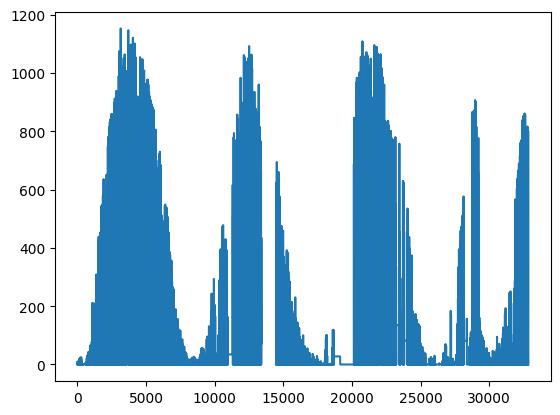

In [132]:
train_b['pv_measurement'].plot()

<Axes: >

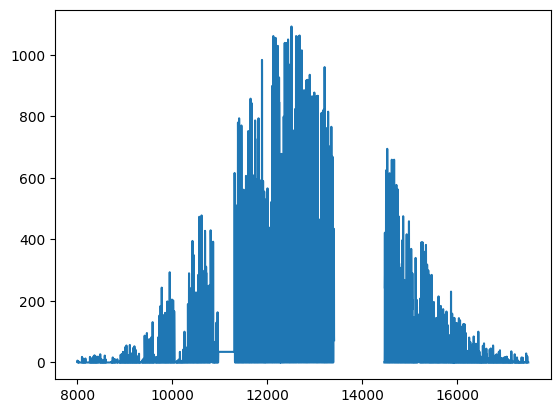

In [133]:
train_b['pv_measurement'].iloc[8000:17500].plot()

<Axes: xlabel='time'>

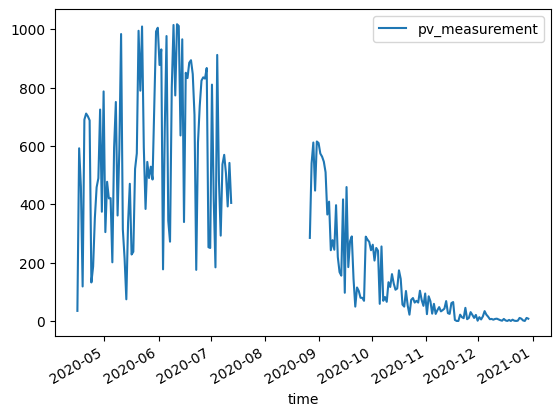

In [134]:
# Determine integer position for a datetime range
start_loc = train_b_time_index.index.get_loc('2020-04-15 10:00:00')
end_loc = train_b_time_index.index.get_loc('2020-12-30 08:00:00')

# Use .iloc to slice the DataFrame based on the positions
selected_data = train_b_time_index.iloc[start_loc:end_loc+1]
selected_data_noon = selected_data[selected_data.index.hour == 12]
selected_data_noon.plot()

In [135]:
fit_data = selected_data_noon.dropna(subset=['pv_measurement'])


In [136]:
numerical_time_values_fit = fit_data.index.astype(np.int64)
scaled_time_values_fit = (numerical_time_values_fit - numerical_time_values_fit.min())


In [137]:
coefficients = np.polyfit(scaled_time_values_fit, fit_data['pv_measurement'], 4)
polynomial = np.poly1d(coefficients)


In [138]:
numerical_time_values_all = selected_data_noon.index.astype(np.int64)
scaled_time_values_all = (numerical_time_values_all - numerical_time_values_fit.min())
y_fit_all = polynomial(scaled_time_values_all)


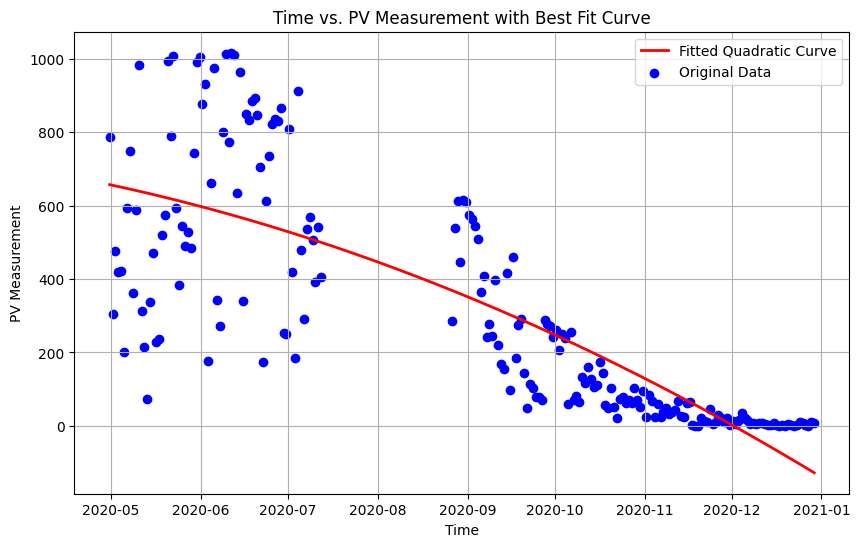

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(selected_data_noon.index, y_fit_all, label='Fitted Quadratic Curve', color='red', linewidth=2)
plt.scatter(selected_data_noon.index, selected_data_noon['pv_measurement'], label='Original Data', color='blue')
plt.title('Time vs. PV Measurement with Best Fit Curve')
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.legend()
plt.grid(True)
plt.show()
